In [24]:
import os
from dotenv import load_dotenv
from tmdbv3api import TMDb, Movie
import pandas as pd

load_dotenv()  # Loads variables from .env

tmdb = TMDb()
tmdb.api_key = os.getenv("TMDB_API_KEY")  # Securely loaded from .env

movie = Movie()
popular_movies = movie.popular()

movie_details_list = []

for m in popular_movies:
    details = movie.details(m.id)
    movie_details_list.append({
        "title": details.title,
        "release_date": details.release_date,
        "runtime": details.runtime,
        "genres": [g['name'] for g in details.genres],
        "popularity": details.popularity,
        "vote_average": details.vote_average,
        "production_countries": [c['name'] for c in details.production_countries]
    })

df = pd.DataFrame(movie_details_list)
df.to_csv("data/tmdb_movies.csv", index=False)
df.head()


,title,release_date,runtime,genres,popularity,vote_average,production_countries
0,Lilo & Stitch,2025-05-17,108,"[Family, Comedy, Science Fiction]",630.3236,7.114,[United States of America]
1,Sinners,2025-04-16,138,"[Horror, Action, Thriller]",408.2362,7.505,[United States of America]
2,A Minecraft Movie,2025-03-31,101,"[Family, Comedy, Adventure, Fantasy]",399.9711,6.485,"[Sweden, United States of America]"
3,Sikandar,2025-03-29,133,"[Action, Drama]",383.9789,5.220,[India]
4,A Working Man,2025-03-26,116,"[Action, Crime, Thriller]",314.5188,6.686,"[United Kingdom, United States of America]"


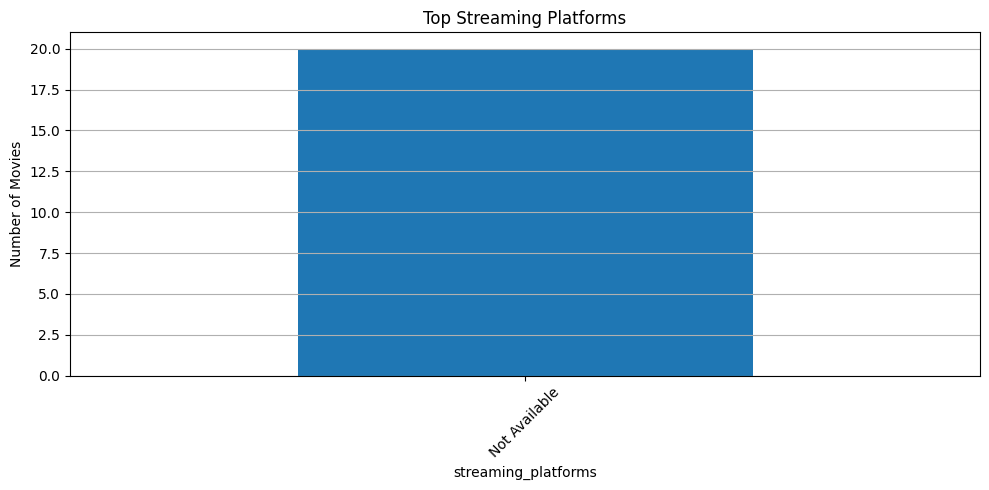

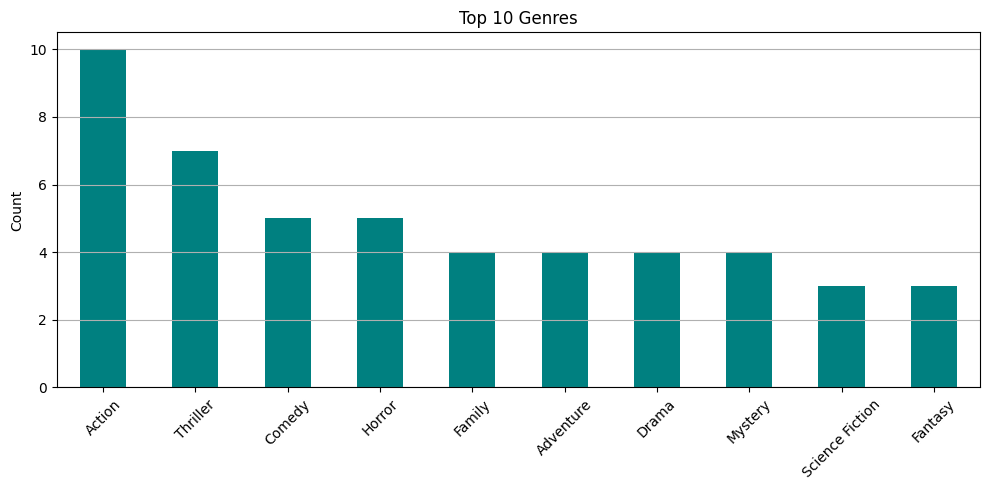

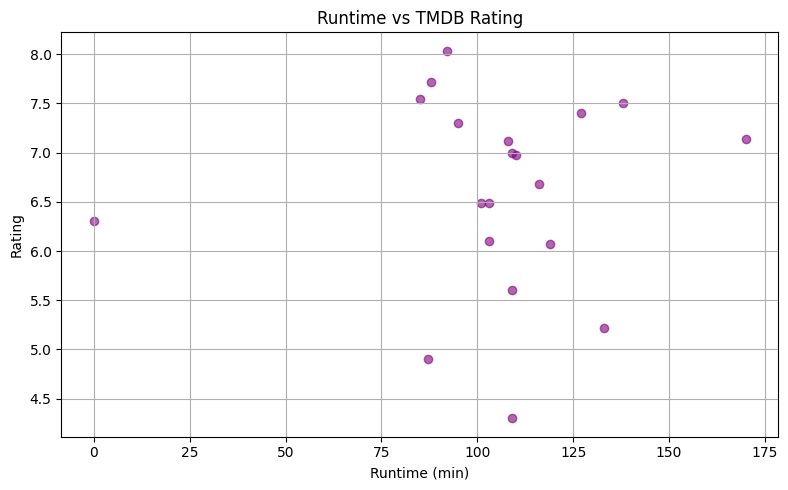

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Load processed data
df = pd.read_csv("data/tmdb_with_streaming.csv")

# Clean genres column if stored as string
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Plot 1: Streaming platforms
plt.figure(figsize=(10,5))
df['streaming_platforms'].value_counts().head(10).plot(kind='bar')
plt.title("Top Streaming Platforms")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot 2: Top genres
flat_genres = [genre for sublist in df['genres'] for genre in sublist]
genre_counts = Counter(flat_genres)

plt.figure(figsize=(10,5))
pd.Series(genre_counts).sort_values(ascending=False).head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot 3: Runtime vs Rating
plt.figure(figsize=(8,5))
plt.scatter(df['runtime'], df['vote_average'], alpha=0.6, color='purple')
plt.title("Runtime vs TMDB Rating")
plt.xlabel("Runtime (min)")
plt.ylabel("Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
streaming_providers = []

for title in df['title']:
    try:
        search_results = movie.search(title)
        if not search_results:
            streaming_providers.append('Not Found')
            continue
        movie_id = search_results[0].id
        provider_info = movie.watch_providers(movie_id)
        us_providers = provider_info.get('results', {}).get('US', {}).get('flatrate', [])
        platforms = [p['provider_name'] for p in us_providers] if us_providers else ['Not Available']
        streaming_providers.append(', '.join(platforms))
    except Exception as e:
        print(f"Error for '{title}':", e)
        streaming_providers.append('Error')

df['streaming_platforms'] = streaming_providers
df.to_csv("data/tmdb_with_streaming.csv", index=False)
df.head()


,title,release_date,runtime,genres,popularity,vote_average,production_countries,streaming_platforms
0,Lilo & Stitch,2025-05-17,108,"[Family, Comedy, Science Fiction]",630.3236,7.114,['United States of America'],Not Available
1,Sinners,2025-04-16,138,"[Horror, Action, Thriller]",408.2362,7.505,['United States of America'],Not Available
2,A Minecraft Movie,2025-03-31,101,"[Family, Comedy, Adventure, Fantasy]",399.9711,6.485,"['Sweden', 'United States of America']",Not Available
3,Sikandar,2025-03-29,133,"[Action, Drama]",383.9789,5.220,['India'],Not Available
4,A Working Man,2025-03-26,116,"[Action, Crime, Thriller]",314.5188,6.686,"['United Kingdom', 'United States of America']",Not Available
